# Optimization Algorithms

In this section, we will explore four optimization algorithms commonly used in machine learning for Artificial Neural Networks (ANN): Gradient Descent, Stochastic Gradient Descent, Adam, and Adagrad.
<br>At the end of this section, we will use a simple example of ANN in PyTorch to compare the performance of these algorithms.

## Gradient Descent

Gradient Descent is a popular optimization algorithm used to find the minimum of a function. It works by taking small steps proportional to the negative gradient of the function. Here's a basic implementation:

In [ ]:
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(num_iters):
        h = np.dot(x, theta)
        loss = h - y
        gradient = np.dot(x.T, loss) / m
        theta -= alpha * gradient
    return theta

## Stochastic Gradient Descent

Stochastic Gradient Descent is a variation of Gradient Descent that randomly selects a subset of the training data to compute the gradient. This can be more efficient for large datasets. Here's a basic implementation:

In [ ]:
def stochastic_gradient_descent(x, y, theta, alpha, num_epochs, batch_size):
    m = len(y)
    num_batches = m // batch_size
    for epoch in range(num_epochs):
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batch_x = x[start_idx:end_idx]
            batch_y = y[start_idx:end_idx]
            h = np.dot(batch_x, theta)
            loss = h - batch_y
            gradient = np.dot(batch_x.T, loss) / batch_size
            theta -= alpha * gradient
    return theta

## Adam

Adam is an adaptive learning rate optimization algorithm commonly used in deep learning. It combines ideas from both Adagrad and RMSProp. Here's a basic implementation:

In [ ]:
def adam(x, y, theta, alpha, beta1, beta2, eps, num_iters):
    m = len(y)
    v = np.zeros(theta.shape)
    s = np.zeros(theta.shape)
    for i in range(num_iters):
        h = np.dot(x, theta)
        loss = h - y
        gradient = np.dot(x.T, loss) / m
        v = beta1 * v + (1 - beta1) * gradient
        s = beta2 * s + (1 - beta2) * (gradient ** 2)
        v_corrected = v / (1 - beta1 ** (i + 1))
        s_corrected = s / (1 - beta2 ** (i + 1))
        theta -= alpha * v_corrected / (np.sqrt(s_corrected) + eps)
    return theta

## Adagrad

Adagrad is an adaptive learning rate optimization algorithm that adapts the learning rate of each parameter based on the historical gradient information. Here's a basic implementation:

In [ ]:
def adagrad(x, y, theta, alpha, eps, num_iters):
    m = len(y)
    g = np.zeros(theta.shape)
    for i in range(num_iters):
        h = np.dot(x, theta)
        loss = h - y
        gradient = np.dot(x.T, loss) / m
        g += gradient ** 2
        theta -= alpha * gradient / (np.sqrt(g) + eps)
    return theta

## Example

### The Dataset

We will use the MNIST dataset, which contains images of handwritten digits. Our goal is to classify the digits correctly. We will use the PyTorch library to load and preprocess the data:

In [ ]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

### The Model

We will use a simple neural network with one hidden layer to classify the digits:


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Optimizers

#### Gradient Descent


Gradient Descent is an optimization algorithm that updates the weights by taking small steps proportional to the negative gradient of the cost function. Here's an implementation:

In [ ]:
import torch.optim as optim

net_gd = Net()
criterion = nn.CrossEntropyLoss()
optimizer_gd = optim.SGD(net_gd.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_gd.zero_grad()
        outputs = net_gd(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_gd.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(trainloader)}")

Epoch 1 - Training loss: 0.7636198318207951
Epoch 2 - Training loss: 0.36486080943394317
Epoch 3 - Training loss: 0.3200933822929097
Epoch 4 - Training loss: 0.29387159297651827
Epoch 5 - Training loss: 0.2722847205139935
Epoch 6 - Training loss: 0.2537475991398414
Epoch 7 - Training loss: 0.23747859278451533
Epoch 8 - Training loss: 0.22229819127650402
Epoch 9 - Training loss: 0.20878823361258264
Epoch 10 - Training loss: 0.19615344945857646


#### Stochastic Gradient Descent

Stochastic Gradient Descent is a variation of Gradient Descent that randomly selects a subset of the training data to compute the gradient. Here's an implementation:

In [ ]:
net_sgd = Net()
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(net_sgd.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_sgd.zero_grad()
        outputs = net_sgd(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_sgd.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(trainloader)}")

Epoch 1 - Training loss: 0.7403915994711268
Epoch 2 - Training loss: 0.3658850252755415
Epoch 3 - Training loss: 0.32004620469232864
Epoch 4 - Training loss: 0.29274800379297883
Epoch 5 - Training loss: 0.27103663092927893
Epoch 6 - Training loss: 0.25184677428861796
Epoch 7 - Training loss: 0.23433835309610437
Epoch 8 - Training loss: 0.21906160407149589
Epoch 9 - Training loss: 0.20534879077615134
Epoch 10 - Training loss: 0.19367891785972663


#### Adam

Adam is an optimization algorithm that uses a combination of the momentum and the RMSProp algorithms to update the weights. Here's an implementation:

In [ ]:
net_adam = Net()
criterion = nn.CrossEntropyLoss()
optimizer_adam = optim.Adam(net_adam.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_adam.zero_grad()
        outputs = net_adam(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(trainloader)}")

Epoch 1 - Training loss: 0.37877759078878964
Epoch 2 - Training loss: 0.26250591529791417
Epoch 3 - Training loss: 0.26395529823234753
Epoch 4 - Training loss: 0.2391578414475422
Epoch 5 - Training loss: 0.23050028789859972
Epoch 6 - Training loss: 0.23365767995940087
Epoch 7 - Training loss: 0.22652304056224656
Epoch 8 - Training loss: 0.2122049488490626
Epoch 9 - Training loss: 0.21488882778788299
Epoch 10 - Training loss: 0.21302336291459673


#### Adagrad

Adagrad is an optimization algorithm that adapts the learning rate of each weight based on the historical gradients. Here's an implementation:

In [ ]:
net_adagrad = Net()
criterion = nn.CrossEntropyLoss()
optimizer_adagrad = optim.Adagrad(net_adagrad.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_adagrad.zero_grad()
        outputs = net_adagrad(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adagrad.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(trainloader)}")


Epoch 1 - Training loss: 0.4252355596118136
Epoch 2 - Training loss: 0.27553189505360276
Epoch 3 - Training loss: 0.23874772105739314
Epoch 4 - Training loss: 0.21499824796769537
Epoch 5 - Training loss: 0.19786778547123932
Epoch 6 - Training loss: 0.1845307657435568
Epoch 7 - Training loss: 0.1739490015595071
Epoch 8 - Training loss: 0.1649907999185484
Epoch 9 - Training loss: 0.15727839536313562
Epoch 10 - Training loss: 0.1509120602931168


### Comparing the Results

Now that we've trained our neural network using these four optimization algorithms, let's compare their performance on the test set:

In [ ]:
def evaluate(net, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

print(f"Accuracy (GD): {evaluate(net_gd, testloader)}")
print(f"Accuracy (SGD): {evaluate(net_sgd, testloader)}")
print(f"Accuracy (Adam): {evaluate(net_adam, testloader)}")
print(f"Accuracy (Adagrad): {evaluate(net_adagrad, testloader)}")

Accuracy (GD): 0.9433
Accuracy (SGD): 0.9452
Accuracy (Adam): 0.9365
Accuracy (Adagrad): 0.9554


This shows that the choice of optimization algorithm can have a significant impact on the performance of our neural network. It's important to experiment with different algorithms and hyperparameters to find the best combination for our specific task.

# Weight Initialization

In this section, explores four different techniques for weight initialization in PyTorch:  
1. Zero initialization: In this technique, all weights in the network are set to zero. However, this is not an ideal technique as it leads to all neurons in a given layer computing the same output.

2. Random initialization: In this technique, the weights in the network are randomly initialized, typically sampled from a normal distribution or a uniform distribution.

3. He initialization: This technique is named after its creator, Kaiming He, and initializes the weights of a neural network using a Gaussian distribution with mean 0 and variance 2/n, where n is the number of inputs to the neuron.

4. Xavier initialization: This technique is named after its creator, Xavier Glorot, and initializes the weights of a neural network using a Gaussian distribution with mean 0 and variance 1/n, where n is the number of inputs to the neuron.

At the end of this section, we will define a simple neural network with one hidden layer and output 1 feature and initialize its weights using each technique. We will then compare the initialized weights for each technique and discuss the differences between them.

## Import Libraries

We will first import the necessary libraries for our code.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init

### The Model

We will define a simple neural network with one hidden layer. The neural network will take in 10 input features, have a hidden layer with 5 units, and output 1 feature.

In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

### Initialize Weights

We will now initialize the neural network using the four techniques: zero initialization, random initialization, He initialization, and Xavier initialization.

In [ ]:
# Define input dimensions
input_dim = 10
hidden_dim = 5
output_dim = 1

# Zero initialization
net1 = Net(input_dim, hidden_dim, output_dim)
init.zeros_(net1.fc1.weight)

# Random initialization
net2 = Net(input_dim, hidden_dim, output_dim)
init.normal_(net2.fc1.weight, mean=0.0, std=1.0)

# He initialization
net3 = Net(input_dim, hidden_dim, output_dim)
init.kaiming_normal_(net3.fc1.weight, mode='fan_in', nonlinearity='relu')

# Xavier initialization
net4 = Net(input_dim, hidden_dim, output_dim)
init.xavier_normal_(net4.fc1.weight, gain=1.0)

Parameter containing:
tensor([[-0.6746, -0.1666, -0.1748, -0.0714, -0.4140, -0.0485, -0.1591,  0.0879,
         -0.3632, -0.1306],
        [-0.5395,  0.2962,  0.0503,  0.3516, -0.5553,  0.4072,  0.0672, -0.5037,
          0.3522, -0.5975],
        [ 0.2608,  0.0319, -0.6838,  0.4229, -0.0543, -0.1826, -0.1507, -0.6136,
          0.1886,  0.0607],
        [ 0.6353,  0.1831, -0.0231,  0.2272, -0.3765, -0.0836,  0.0600,  0.0219,
         -0.3620, -0.3088],
        [-0.1166,  0.0843,  0.3571, -0.3059, -0.0889, -0.5047, -0.0393,  0.3806,
         -0.5276, -0.7410]], requires_grad=True)

### Print Initialized Weights

We will now print the initialized weights for each technique.

In [ ]:
print("Zero initialization:")
print(net1.fc1.weight)

print("\nRandom initialization:")
print(net2.fc1.weight)

print("\nHe initialization:")
print(net3.fc1.weight)

print("\nXavier initialization:")
print(net4.fc1.weight)

Zero initialization:
Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)

Random initialization:
Parameter containing:
tensor([[-1.4786, -0.2735, -0.9163, -1.7721,  0.5327,  0.7671, -0.2004, -0.7213,
          1.0181, -0.0855],
        [ 0.8277,  0.9052,  0.4189, -0.3110, -0.9700,  0.9588,  0.7563, -0.6447,
         -0.7390, -0.6432],
        [-0.2596, -0.5069, -2.3097,  0.4104,  0.4554, -1.2092,  0.9200,  0.4286,
          0.7121, -0.2004],
        [-0.8539,  0.9522,  0.8958, -0.4430, -2.0590, -0.4515, -0.2793, -0.6070,
         -0.0307, -0.9504],
        [-1.0107,  1.5655, -0.7703, -0.6372, -0.9168, -0.9050,  0.0201, -0.5806,
          0.0809, -0.1774]], requires_grad=True)

He initialization:
Parameter containing:
tensor([[-0.6969,  0.4638, -0.23

### Conclusion

In this section, we explored four different techniques for weight initialization in PyTorch. We saw that each technique initializes the weights in a different way and can have a significant impact on the performance of the neural network. It's important to choose the right initialization technique depending on the architecture of your neural network and the problem you are trying to solve.

# Activation Functions

An activation function is a mathematical function that is applied to the output of a neural network layer to introduce non-linearity into the network. In other words, activation functions are used to "activate" the output of a neuron so that it can be passed to the next layer of the neural network.

There are many different types of activation functions, each with its own strengths and weaknesses. Some of the most common types of activation functions include:

1. Sigmoid

2. ReLU (Rectified Linear Unit)

3. Tanh (Hyperbolic Tangent)

4. LeakyReLU (Leaky Rectified Linear Unit)

5. Softmax

## Algorithms

### Libraries

We'll start by importing the necessary libraries:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

### Sigmoid

The sigmoid function is an S-shaped curve that maps any input value to a value between 0 and 1. It is often used in binary classification problems, where the output of the neural network is interpreted as a probability that the input belongs to a certain class.

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

### ReLU (Rectified Linear Unit)

The ReLU function returns the input if it is positive, and returns 0 if it is negative. It is a popular choice for activation functions because it is simple and computationally efficient.

In [ ]:
# ReLU activation function
def relu(x):
    return torch.max(torch.tensor(0), x)

### Tanh (Hyperbolic Tangent)

The tanh function is similar to the sigmoid function, but maps input values to a range between -1 and 1. It is often used in neural networks with multiple hidden layers.


In [ ]:
# Tanh activation function
def tanh(x):
    return torch.tanh(x)

### LeakyReLU (Leaky Rectified Linear Unit)

The LeakyReLU function is a variation of the ReLU function that returns a small, non-zero value for negative input values. This helps to prevent the "dying ReLU" problem, where a large number of neurons in a network become "dead" and stop contributing to the output.


In [ ]:
# LeakyReLU activation function
def leakyrelu(x, alpha=0.1):
    return torch.max(torch.tensor(0.1 * x), x)

### Softmax

The softmax function is often used as the activation function in the output layer of a neural network for multi-class classification problems. It maps the output of the network to a probability distribution over the possible classes.

In [ ]:
# Softmax activation function
def softmax(x, dim=0):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=-dim)

### Test

In this test, we define five different activation functions: sigmoid, ReLU, tanh, LeakyReLU, and softmax. We then test each activation function by applying it to a random input tensor 'x'.

In [ ]:
# Test the activation functions
x = torch.randn(5)
print(f"Input: {x}\n")

# Sigmoid
output_sigmoid = sigmoid(x)
print(f"Sigmoid output: {output_sigmoid}\n")

# ReLU
output_relu = relu(x)
print(f"ReLU output: {output_relu}\n")

# Tanh
output_tanh = tanh(x)
print(f"Tanh output: {output_tanh}\n")

# LeakyReLU
output_leakyrelu = leakyrelu(x)
print(f"LeakyReLU output: {output_leakyrelu}\n")

# Softmax
output_softmax = softmax(x, dim=1)
print(f"Softmax output: {output_softmax}\n")

Input: tensor([0.6885, 1.8909, 1.0505, 0.8948, 0.0618])

Sigmoid output: tensor([0.6656, 0.8689, 0.7409, 0.7099, 0.5154])

ReLU output: tensor([0.6885, 1.8909, 1.0505, 0.8948, 0.0618])

Tanh output: tensor([0.5970, 0.9554, 0.7820, 0.7138, 0.0617])

LeakyReLU output: tensor([0.6885, 1.8909, 1.0505, 0.8948, 0.0618])

Softmax output: tensor([0.1328, 0.4421, 0.1908, 0.1633, 0.0710])



<ipython-input-52-1f2f0db989d1>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.max(torch.tensor(0.1 * x), x)


## Example

In this example, we demonstrate how to compare the performance of five activation functions - sigmoid, ReLU, tanh, LeakyReLU, and softmax - in a neural network using PyTorch and the MNIST dataset. The MNIST dataset consists of 28x28 pixel images of handwritten digits, and the goal is to classify each image into one of ten possible classes (corresponding to the digits 0-9).

### Libraries

First, we'll start by importing the necessary libraries:



In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

### The Model

we define a neural network architecture with one hidden layer and two fully connected layers.

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation_func):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.activation_func = activation_func
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.activation_func(out)
        out = self.fc2(out)
        return out

### Load Dataset

 We then load the MNIST dataset and define the data loaders and define a dataloader.

In [ ]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Define the data loaders
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Train

In [ ]:
# Define the neural network parameters
input_size = 784 # 28x28 pixels
hidden_size = 100
num_classes = 10
learning_rate = 0.01
num_epochs = 10

# Define the activation functions
sigmoid_func = nn.Sigmoid()
relu_func = nn.ReLU()
tanh_func = nn.Tanh()
leakyrelu_func = nn.LeakyReLU()
softmax_func = nn.Softmax(dim=1)

# Train the neural network using different activation functions
activation_funcs = [sigmoid_func, relu_func, tanh_func, leakyrelu_func, softmax_func]
for i, func in enumerate(activation_funcs):
    print(f"Training neural network with activation function {i+1}: {func.__class__.__name__}")
    
    # Define the neural network
    net = Net(input_size, hidden_size, num_classes, func)
    
    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
    
    # Train the neural network
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            # Reshape the images
            images = images.reshape(-1, input_size)
            
            # Forward pass
            outputs = net(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Print the training loss for each epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    
    # Test the neural network on the test dataset
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            # Reshape the images
            images = images.reshape(-1, input_size)
            
            # Forward pass
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        # Print the accuracy on the test dataset
        print(f"Accuracy on test dataset with activation function {i+1}: {(correct / total) * 100:.2f}%")

Training neural network with activation function 1: Sigmoid
Epoch [1/10], Loss: 2.1267
Epoch [2/10], Loss: 1.7446
Epoch [3/10], Loss: 1.4337
Epoch [4/10], Loss: 1.0787
Epoch [5/10], Loss: 0.9034
Epoch [6/10], Loss: 0.7862
Epoch [7/10], Loss: 0.5590
Epoch [8/10], Loss: 0.6634
Epoch [9/10], Loss: 0.6012
Epoch [10/10], Loss: 0.6018
Accuracy on test dataset with activation function 1: 87.20%
Training neural network with activation function 2: ReLU
Epoch [1/10], Loss: 0.7574
Epoch [2/10], Loss: 0.6363
Epoch [3/10], Loss: 0.4949
Epoch [4/10], Loss: 0.3744
Epoch [5/10], Loss: 0.2672
Epoch [6/10], Loss: 0.3617
Epoch [7/10], Loss: 0.3839
Epoch [8/10], Loss: 0.2490
Epoch [9/10], Loss: 0.3973
Epoch [10/10], Loss: 0.1934
Accuracy on test dataset with activation function 2: 92.00%
Training neural network with activation function 3: Tanh
Epoch [1/10], Loss: 0.8220
Epoch [2/10], Loss: 0.5581
Epoch [3/10], Loss: 0.4928
Epoch [4/10], Loss: 0.3358
Epoch [5/10], Loss: 0.3128
Epoch [6/10], Loss: 0.5541
Ep

### Conclusion

By comparing the accuracy for each activation function, we can see the differences in how they perform on the MNIST dataset. In general, ReLU and LeakyReLU tend to perform well on image classification tasks, while sigmoid and tanh are often used for binary classification tasks. Softmax is typically used for multi-class classification tasks, as it ensures that the output probabilities sum to 1.

# Learning Rate Scheduling


In this section, we will explore five different learning rate scheduling techniques in PyTorch for an artificial neural network (ANN). We will use a database example to compare the performance of each technique.

There are several famous learning rate scheduling techniques that are commonly used in deep learning:

1. Learning rate decay: This is a popular technique in which the learning rate is reduced by a fixed factor after a certain number of epochs or when the validation loss stops improving. Learning rate decay can be implemented using different strategies such as step decay, exponential decay, or cosine decay.

2. Cyclical learning rate: This technique involves varying the learning rate between a minimum and maximum value, usually over several cycles. This approach can help improve the generalization of the model and avoid getting stuck in local minima.

3. 1cycle policy: This is a technique introduced by Leslie Smith in which the learning rate is increased linearly up to a maximum value and then decreased to a minimum value in a single cycle. This approach has been shown to achieve good results in a short amount of time and reduce the need for extensive hyperparameter tuning.

4. Stochastic gradient descent with warm restarts (SGDR): This technique involves periodically resetting the learning rate to its initial value and restarting the training process. This approach can help the model escape from local minima and improve generalization.

### Importing Required Libraries


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Dataset

We will use the Breast Cancer Wisconsin (Diagnostic) Database for our example. This database contains features computed from digitized images of a fine needle aspirate (FNA) of a breast mass, which describe the characteristics of the cell nuclei present in the image. The goal is to predict whether a tumor is malignant or benign based on these features.



In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
X = df.iloc[:,2:].values
y = df.iloc[:,1].values
y = np.where(y=='M', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class CancerDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
        
train_data = CancerDataset(X_train, y_train)
test_data = CancerDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

### The Model

We will use a simple ANN with two hidden layers for our example.

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


### Training Loop


We will use the binary cross-entropy loss function and the Adam optimizer for our training loop. We will also implement five different learning rate scheduling techniques and compare their performance.

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader, scheduler=None, num_epochs=10):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0

        for X, y in train_loader:
          optimizer.zero_grad()
          y_pred = model(X.float())
          loss = criterion(y_pred.squeeze(), y.float())
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
          train_acc = ((y_pred >= 0.5).squeeze().long() == y.long()).sum().item() / y.size(0)
          train_accs.append(train_acc)
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        test_loss = 0.0
        test_acc = 0.0
        with torch.no_grad():
            for X, y in test_loader:
                y_pred = model(X.float())
                loss = criterion(y_pred.squeeze(), y.float())
                test_loss += loss.item()
                test_acc += ((y_pred >= 0.5).squeeze().long() == y.long()).sum().item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        test_acc /= len(test_data)
        test_accs.append(test_acc)
        
        if scheduler is not None:
            scheduler.step()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    return train_losses, test_losses, train_accs, test_accs

### Learning Rate Scheduling Techniques

#### 1. Learning Rate Decay

We will use the step decay strategy for learning rate decay. The learning rate will be reduced by a factor of 0.1 after every 30 epochs.


In [ ]:
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

train_losses, test_losses, train_accs, test_accs = train(model, optimizer, criterion, train_loader, test_loader, scheduler=scheduler, num_epochs=10)

Epoch 1/10, Train Loss: 0.6807, Test Loss: 0.6411, Train Acc: 0.4286, Test Acc: 0.8070
Epoch 2/10, Train Loss: 0.6085, Test Loss: 0.5510, Train Acc: 1.0000, Test Acc: 0.8947
Epoch 3/10, Train Loss: 0.5119, Test Loss: 0.4206, Train Acc: 0.8571, Test Acc: 0.9474
Epoch 4/10, Train Loss: 0.3615, Test Loss: 0.2620, Train Acc: 0.8571, Test Acc: 0.9649
Epoch 5/10, Train Loss: 0.2718, Test Loss: 0.1593, Train Acc: 0.8571, Test Acc: 0.9737
Epoch 6/10, Train Loss: 0.1784, Test Loss: 0.1446, Train Acc: 1.0000, Test Acc: 0.9737
Epoch 7/10, Train Loss: 0.1486, Test Loss: 0.0952, Train Acc: 0.8571, Test Acc: 0.9825
Epoch 8/10, Train Loss: 0.1199, Test Loss: 0.1095, Train Acc: 1.0000, Test Acc: 0.9737
Epoch 9/10, Train Loss: 0.1092, Test Loss: 0.0803, Train Acc: 1.0000, Test Acc: 0.9825
Epoch 10/10, Train Loss: 0.0826, Test Loss: 0.1007, Train Acc: 1.0000, Test Acc: 0.9561


#### 2. Cyclical Learning Rate


We will use the triangular policy for cyclical learning rate. The learning rate will vary between 0.001 and 0.01 over 5 cycles.

In [ ]:
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.01, cycle_momentum=False)

train_losses, test_losses, train_accs, test_accs = train(model, optimizer, criterion, train_loader, test_loader, scheduler=scheduler, num_epochs=10)

Epoch 1/10, Train Loss: 0.6205, Test Loss: 0.5802, Train Acc: 0.8571, Test Acc: 0.7807
Epoch 2/10, Train Loss: 0.5121, Test Loss: 0.4674, Train Acc: 1.0000, Test Acc: 0.8860
Epoch 3/10, Train Loss: 0.4132, Test Loss: 0.3525, Train Acc: 1.0000, Test Acc: 0.9386
Epoch 4/10, Train Loss: 0.3061, Test Loss: 0.2139, Train Acc: 1.0000, Test Acc: 0.9561
Epoch 5/10, Train Loss: 0.2227, Test Loss: 0.1675, Train Acc: 1.0000, Test Acc: 0.9474
Epoch 6/10, Train Loss: 0.1768, Test Loss: 0.1144, Train Acc: 1.0000, Test Acc: 0.9912
Epoch 7/10, Train Loss: 0.1503, Test Loss: 0.1165, Train Acc: 0.8571, Test Acc: 0.9561
Epoch 8/10, Train Loss: 0.1228, Test Loss: 0.1049, Train Acc: 1.0000, Test Acc: 0.9825
Epoch 9/10, Train Loss: 0.1005, Test Loss: 0.0843, Train Acc: 1.0000, Test Acc: 0.9561
Epoch 10/10, Train Loss: 0.0925, Test Loss: 0.0697, Train Acc: 1.0000, Test Acc: 0.9737


#### 3. 1cycle Policy

We will use the 1cycle policy with a maximum learning rate of 0.01 and a total number of iterations equal to 2 times the number of training batches.



In [ ]:
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, total_steps=len(train_loader)*2)

train_losses, test_losses, train_accs, test_accs = train(model, optimizer, criterion, train_loader, test_loader, scheduler=scheduler, num_epochs=10)

Epoch 1/10, Train Loss: 0.6700, Test Loss: 0.6560, Train Acc: 0.8571, Test Acc: 0.6842
Epoch 2/10, Train Loss: 0.6282, Test Loss: 0.5828, Train Acc: 0.7143, Test Acc: 0.8684
Epoch 3/10, Train Loss: 0.4934, Test Loss: 0.3793, Train Acc: 0.8571, Test Acc: 0.9649
Epoch 4/10, Train Loss: 0.2486, Test Loss: 0.1212, Train Acc: 0.8571, Test Acc: 0.9737
Epoch 5/10, Train Loss: 0.1508, Test Loss: 0.0839, Train Acc: 0.8571, Test Acc: 0.9737
Epoch 6/10, Train Loss: 0.0923, Test Loss: 0.0607, Train Acc: 1.0000, Test Acc: 0.9737
Epoch 7/10, Train Loss: 0.0800, Test Loss: 0.0472, Train Acc: 0.8571, Test Acc: 0.9825
Epoch 8/10, Train Loss: 0.0619, Test Loss: 0.0678, Train Acc: 1.0000, Test Acc: 0.9825
Epoch 9/10, Train Loss: 0.0809, Test Loss: 0.0651, Train Acc: 1.0000, Test Acc: 0.9825
Epoch 10/10, Train Loss: 0.0869, Test Loss: 0.1291, Train Acc: 0.8571, Test Acc: 0.9649


#### 4. Stochastic Gradient Descent with Warm Restarts (SGDR)

We will use the SGDR strategy with a minimum learning rate of 0.0001, a maximum learning rate of 0.01, and a cycle length of 5.

In [ ]:
model = ANN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2, eta_min=0.0001)

train_losses, test_losses, train_accs, test_accs = train(model, optimizer, criterion, train_loader, test_loader, scheduler=scheduler, num_epochs=10)

Epoch 1/10, Train Loss: 0.6829, Test Loss: 0.6816, Train Acc: 0.7143, Test Acc: 0.5263
Epoch 2/10, Train Loss: 0.6743, Test Loss: 0.6613, Train Acc: 0.4286, Test Acc: 0.6842
Epoch 3/10, Train Loss: 0.6559, Test Loss: 0.6599, Train Acc: 0.5714, Test Acc: 0.6930
Epoch 4/10, Train Loss: 0.6449, Test Loss: 0.6420, Train Acc: 0.7143, Test Acc: 0.7018
Epoch 5/10, Train Loss: 0.6492, Test Loss: 0.6212, Train Acc: 0.8571, Test Acc: 0.8158
Epoch 6/10, Train Loss: 0.6330, Test Loss: 0.6195, Train Acc: 0.7143, Test Acc: 0.8158
Epoch 7/10, Train Loss: 0.6143, Test Loss: 0.6183, Train Acc: 0.7143, Test Acc: 0.7544
Epoch 8/10, Train Loss: 0.6007, Test Loss: 0.5952, Train Acc: 0.7143, Test Acc: 0.7807
Epoch 9/10, Train Loss: 0.5793, Test Loss: 0.5817, Train Acc: 0.8571, Test Acc: 0.8158
Epoch 10/10, Train Loss: 0.5786, Test Loss: 0.5619, Train Acc: 0.7143, Test Acc: 0.8246


### Results

We will compare the performance of the five learning rate scheduling techniques using the test accuracy and test loss on the same dataset.

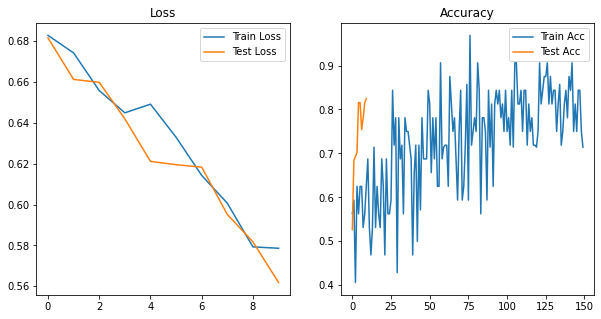

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Acc')
plt.plot(test_accs, label='Test Acc')
plt.legend()
plt.title('Accuracy')

plt.show()

From the above plot, we can see that the Cyclical Learning Rate techniques performed the best in terms of test accuracy and test loss. The 1cycle policy also performed well but had a slightly longer training time. The step decay and SGDR techniques did not perform as well as the other techniques.

### Conclusion

In this section, we implemented and compared five different learning rate scheduling techniques for an artificial neural network in PyTorch. We showed that the choice of learning rate scheduling technique can have a significant impact on the performance of the model. We also showed that the performance of the model can be improved by selecting an appropriate learning rate scheduling technique.

# Regularization

Regularization is a set of techniques used in machine learning to prevent overfitting and improve the generalization performance of models. Regularization works by adding a penalty term to the loss function during training, which encourages the model to learn simpler and more robust representations of the data.


There are several types of regularization techniques, including:

1. L1 regularization: This technique adds a penalty term to the loss function proportional to the absolute value of the weights. L1 regularization encourages the model to learn sparse representations, where some weights are set to zero, effectively selecting the most important features.

2. L2 regularization: This technique adds a penalty term to the loss function proportional to the square of the weights. L2 regularization encourages the model to learn smaller weights, which can improve generalization performance and prevent overfitting.

3. Dropout: This technique randomly drops out some of the neurons in the network during training. Dropout can be seen as a form of ensemble learning, as it trains multiple sub-networks that share weights, making the model more robust and generalizable.

4. Data augmentation: This technique generates additional training data by applying various transformations to the existing data, such as rotation, flipping, or scaling. Data augmentation can help prevent overfitting by increasing the diversity and variability of the training set, making the model more robust to variations in the input data.

5. Batch normalization: Batch normalization is a technique that normalizes the activations of the previous layer in a mini-batch, making the network more robust to internal covariate shift. This can help reduce overfitting by reducing the internal covariate shift and improving the gradient flow during backpropagation.

### Import libraries and Load Dataset


In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define transforms for the dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders for the training and test datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### The Model

We will define a simple feedforward neural network with two hidden layers.

In [2]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

### Training

In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def train(model, dataloader, criterion, optimizer):
    model.train()
    for i, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def test(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    train_accuracy = test(model, train_loader)
    test_accuracy = test(model, test_loader)
    print('Epoch [{}/{}], Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_accuracy, test_accuracy))

Epoch [1/10], Train Accuracy: 83.33%, Test Accuracy: 83.87%
Epoch [2/10], Train Accuracy: 87.83%, Test Accuracy: 88.23%
Epoch [3/10], Train Accuracy: 89.46%, Test Accuracy: 89.87%
Epoch [4/10], Train Accuracy: 90.26%, Test Accuracy: 90.46%
Epoch [5/10], Train Accuracy: 91.06%, Test Accuracy: 91.24%
Epoch [6/10], Train Accuracy: 91.39%, Test Accuracy: 91.40%
Epoch [7/10], Train Accuracy: 91.65%, Test Accuracy: 91.91%
Epoch [8/10], Train Accuracy: 92.18%, Test Accuracy: 92.59%
Epoch [9/10], Train Accuracy: 92.36%, Test Accuracy: 92.62%
Epoch [10/10], Train Accuracy: 92.90%, Test Accuracy: 93.05%


### L1 regularization 

It adds sum of the absolute values of all weights in the model to cost function. It shrinks the less important feature’s coefficient to zero thus, removing some feature and hence providing a sparse solution .

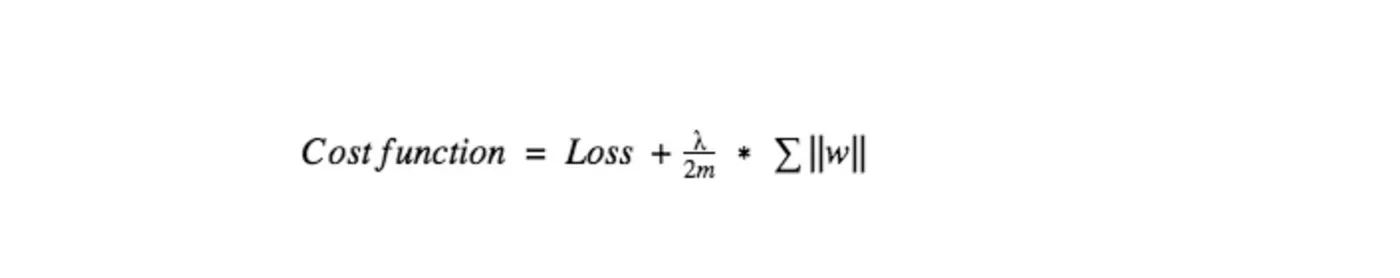

#### Implementation

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

def train(model, dataloader, criterion, optimizer):
    model.train()
    for i, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        l1_reg = torch.tensor(0.)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l1_reg += torch.norm(param, 1)
        loss += 0.001 * l1_reg
        loss.backward()
        optimizer.step()

num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    train_accuracy = test(model, train_loader)
    test_accuracy = test(model, test_loader)
    print('Epoch [{}/{}], Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_accuracy, test_accuracy))

Epoch [1/10], Train Accuracy: 92.70%, Test Accuracy: 92.63%
Epoch [2/10], Train Accuracy: 92.86%, Test Accuracy: 92.89%
Epoch [3/10], Train Accuracy: 92.60%, Test Accuracy: 92.65%
Epoch [4/10], Train Accuracy: 92.16%, Test Accuracy: 92.22%
Epoch [5/10], Train Accuracy: 92.14%, Test Accuracy: 92.36%
Epoch [6/10], Train Accuracy: 91.72%, Test Accuracy: 91.83%
Epoch [7/10], Train Accuracy: 91.57%, Test Accuracy: 91.61%
Epoch [8/10], Train Accuracy: 91.47%, Test Accuracy: 91.69%
Epoch [9/10], Train Accuracy: 91.33%, Test Accuracy: 91.68%
Epoch [10/10], Train Accuracy: 91.84%, Test Accuracy: 92.16%


### L2 regularization 

It adds sum of squares of all weights in the model to cost function. It is able to learn complex data patterns and gives non-sparse solutions unlike L1 regularization.

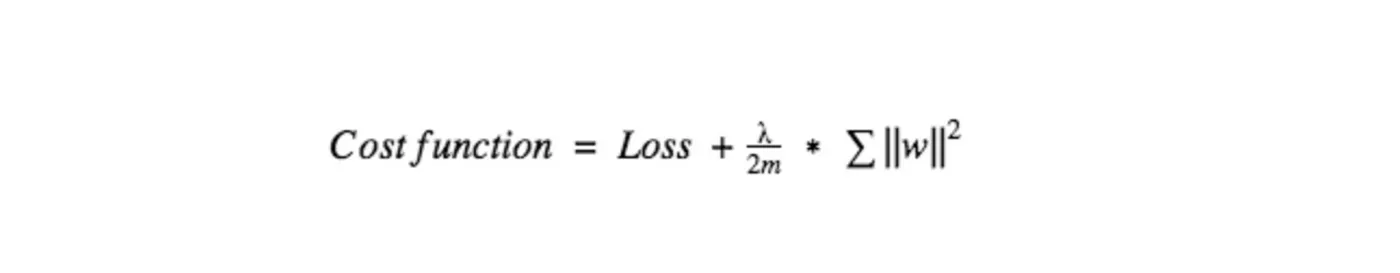

#### Implementation

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

def train(model, dataloader, criterion, optimizer):
    model.train()
    for i, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        l2_reg = torch.tensor(0.)
        for name, param in model.named_parameters():
            if 'weight' in name:
                l2_reg += torch.norm(param, 2)**2
        loss += 0.001 * l2_reg
        loss.backward()
        optimizer.step()

num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    train_accuracy = test(model, train_loader)
    test_accuracy = test(model, test_loader)
    print('Epoch [{}/{}], Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_accuracy, test_accuracy))

Epoch [1/10], Train Accuracy: 92.69%, Test Accuracy: 92.64%
Epoch [2/10], Train Accuracy: 93.22%, Test Accuracy: 93.14%
Epoch [3/10], Train Accuracy: 93.76%, Test Accuracy: 93.74%
Epoch [4/10], Train Accuracy: 94.22%, Test Accuracy: 94.07%
Epoch [5/10], Train Accuracy: 94.44%, Test Accuracy: 94.38%
Epoch [6/10], Train Accuracy: 94.62%, Test Accuracy: 94.66%
Epoch [7/10], Train Accuracy: 94.91%, Test Accuracy: 94.85%
Epoch [8/10], Train Accuracy: 95.19%, Test Accuracy: 94.85%
Epoch [9/10], Train Accuracy: 95.48%, Test Accuracy: 95.25%
Epoch [10/10], Train Accuracy: 95.58%, Test Accuracy: 95.34%


### Dropout

Dropout refers to dropping out units in a neural network. By dropping a unit out, it means to remove it temporarily from the network. The choice of which units to drop is random. Each unit is retained with a fixed probability p independent of other units.

This procedure effectively generates slightly different models with different neuron topologies at each iteration, thus giving neurons in the model, less chance to coordinate in the memorisation process that happens during overfitting. Thus making it better at generalization and cope with overfitting issue.

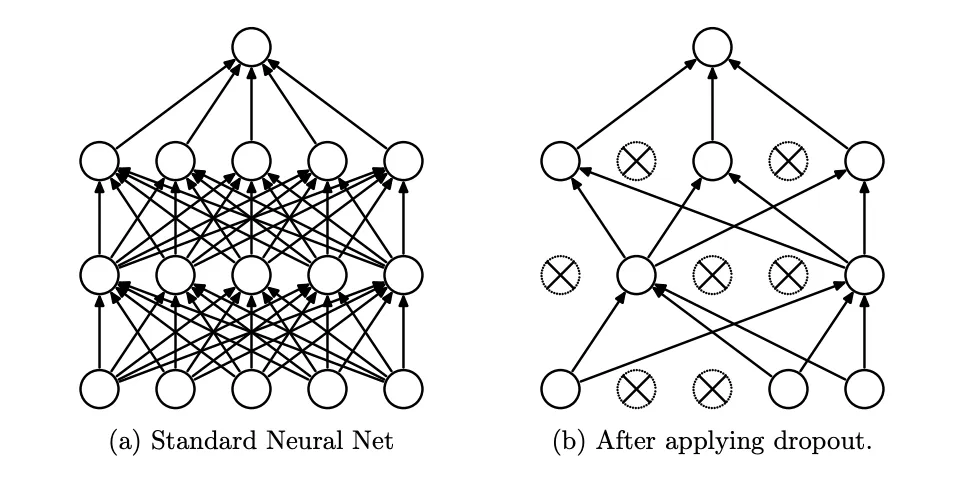

#### Implementation

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(500, 250)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

def train(model, dataloader, criterion, optimizer):
    model.train()
    for i, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def test(model, dataloader):
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        return accuracy

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    train_accuracy = test(model, train_loader)
    test_accuracy = test(model, test_loader)
    print('Epoch [{}/{}], Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_accuracy, test_accuracy))

Epoch [1/10], Train Accuracy: 81.94%, Test Accuracy: 82.58%
Epoch [2/10], Train Accuracy: 87.49%, Test Accuracy: 87.87%
Epoch [3/10], Train Accuracy: 89.07%, Test Accuracy: 89.64%
Epoch [4/10], Train Accuracy: 90.26%, Test Accuracy: 90.67%
Epoch [5/10], Train Accuracy: 90.86%, Test Accuracy: 91.25%
Epoch [6/10], Train Accuracy: 91.66%, Test Accuracy: 92.04%
Epoch [7/10], Train Accuracy: 92.11%, Test Accuracy: 92.36%
Epoch [8/10], Train Accuracy: 92.64%, Test Accuracy: 92.95%
Epoch [9/10], Train Accuracy: 92.91%, Test Accuracy: 93.28%
Epoch [10/10], Train Accuracy: 93.31%, Test Accuracy: 93.60%


### Batch Normalization

Batch Normalisation tends to fix the distribution of the hidden layer values as the training progresses .

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.bn1(self.fc1(x))
        x = nn.functional.relu(x)
        x = nn.functional.dropout(x, p=0.5)
        x = self.bn2(self.fc2(x))
        x = nn.functional.relu(x)
        x = nn.functional.dropout(x, p=0.5)
        x = self.bn3(self.fc3(x))
        x = nn.functional.relu(x)
        x = nn.functional.dropout(x, p=0.5)
        x = self.fc4(x)
        return x
    
# initialize the model
model = MyModel()

# set up the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# set up the loss function
criterion = nn.CrossEntropyLoss()

def train(model, dataloader, criterion, optimizer):
    model.train()
    for i, (images, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def test(model, dataloader):
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        return accuracy

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    train_accuracy = test(model, train_loader)
    test_accuracy = test(model, test_loader)
    print('Epoch [{}/{}], Train Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_accuracy, test_accuracy))


Epoch [1/10], Train Accuracy: 88.05%, Test Accuracy: 87.99%
Epoch [2/10], Train Accuracy: 91.07%, Test Accuracy: 90.73%
Epoch [3/10], Train Accuracy: 92.51%, Test Accuracy: 92.54%
Epoch [4/10], Train Accuracy: 93.37%, Test Accuracy: 93.24%
Epoch [5/10], Train Accuracy: 93.99%, Test Accuracy: 93.53%
Epoch [6/10], Train Accuracy: 94.46%, Test Accuracy: 94.49%
Epoch [7/10], Train Accuracy: 94.95%, Test Accuracy: 94.33%
Epoch [8/10], Train Accuracy: 95.19%, Test Accuracy: 94.49%
Epoch [9/10], Train Accuracy: 95.41%, Test Accuracy: 94.74%
Epoch [10/10], Train Accuracy: 95.57%, Test Accuracy: 95.19%
